# Titanic Dataset

This notebook is a guide to data analysis to understand the steps that can be done to familiarize with and explore the data using Python, followed by predictive modelling.

The first step in any data analysis project is to look at the data. We need to see how many observations/rows, how many features/columns are contained, what these columns mean, and so on. This will help us warm up and get familiar with the dataset, and might even help us to evaluate which features are important and which aren't.


## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

In [1]:
# Import data analysis libraries

import numpy as np
import pandas as pd


A DataFrame is very efficient two-dimensional data structure. It is flat in structure and is arranged in rows and columns, which can be indexed or named. 
Pandas library supports methods to explore, analyze, and prepare data. It can be used for performing activities such as load, filter, sort, group, join datasets and also for dealing with missing data. 

In [3]:
'''import piplite
await piplite.install('seaborn')'''

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read in the dataset

titanic = pd.read_csv('titanic.csv')

Pandas library has provided different methods for loading datasets with many different formats onto DataFrames. For example: 
read_csv to read comma separated values. 
read_json to read data with json format. 
read_fwf to read data with fixed width format. 
read_excel to read excel files. 
read_table to read database tables.  

A quick way to check out the contents of a data frame is by calling the first 5 rows using the .head() method without specifying the argument within brackets. 

In [5]:
# If we want to check out the first 10 rows, we put in 10 as the argument.
titanic.head(10) # a method

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic.shape # an attribute

(891, 12)

In [7]:
type(titanic)

pandas.core.frame.DataFrame

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can count 12 features describing each person on board the Titanic. Our target feature (also known as the independent variable) is the Survived column, which is 1 if the person survived and 0 if not.

In order to quickly generate a table of data types contained within each column, we use the .info() method.

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We know there are 7 numerical columns (floats and integers), 5 non-numerical columns, and their names as well. The output also tells us there are 891 rows/entries and 12 columns. For numerical columns such as Age, Fare, etc., we would like to find out their mean, maximum and minimum values to see if the data is reasonably distributed or if there are any anomalies or mistakes

In [10]:
# Generate a summary of statistics for each numerical column of the data frame
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the summary, we can see that Age has a count less than the total number of columns, which means there are some missing values (indicated by NaN). Columns having missing values can also be detected from the info method previously discussed. In fact, the Cabin column contains more than 600 missing values and the Embarked column contains 2 missing values. The rest of the columns seem to be in good shape.

Another way to check columns with missing values is shown below:

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Another useful method for exploration is the .value_counts() method, which counts the number of occurrences for each unique category within a column.

In [12]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Exploratory Data Analysis using Visualization

Data visualization is useful to gain insight and understand what happened in the past in a given context. Let us look at various plots that we can draw using Python. 

1. Drawing Plots 
Matplotlib is a library for creating 2D plots of arrays in Python.
It provides extensive set of plotting APIs to create various plots such as scattered, bar, box, and distribution plots with custom styling and annotation. 

Seaborn is a library for making elegant charts in Python and is well integrated with Pandas DataFrame. 
It provides a high-level interface for drawing innovative and informative statistical charts. 

To create graphs and plots, we need to import matplotlib.pyplot and seaborn modules. 
To display the plots on the Jupyter Notebook, we need to provide a directive %matplotlib inline. 


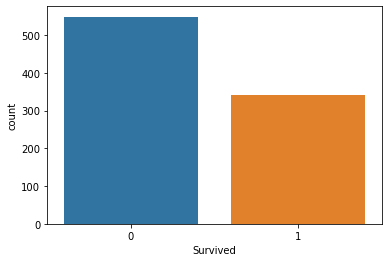

In [13]:
# to see the overall survival 

sns.countplot(x='Survived', data = titanic)
plt.show()

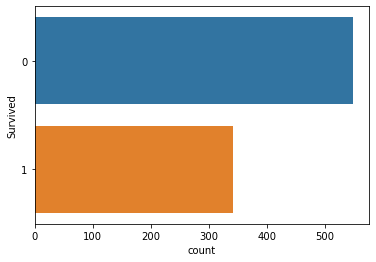

In [14]:
sns.countplot(y='Survived', data = titanic)
plt.show()

seaborn.countplot

Shows the counts of observations in each categorical bin using bars.

seaborn.catplot

Provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.

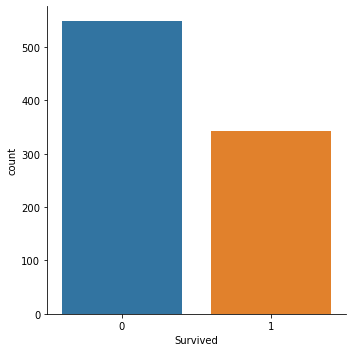

In [15]:
sns.catplot(data = titanic, x = 'Survived', kind ='count')
plt.show()

Only around 40% of people survived. Is there a way to find out what kinds of people are more likely to survive? Are there special features shared by survivors? To answer these questions, we need to look at the other columns and their relationships to the Survived column.

The PassengerId column is just another index column on top of the original index starting from 0, so it cannot influence a passenger's survival.

Observe the Pclass column. There are three categories in this column: 1st Class, 2nd Class and 3rd Class passengers represented by the numbers 1, 2 and 3, respectively. We would expect 1st Class passengers to be given priority in boarding the ship and perhaps priority in being saved in the lifeboats. Hence, we could expect a higher survival rate of 1st Class passengers compared to 2nd or 3rd Class.

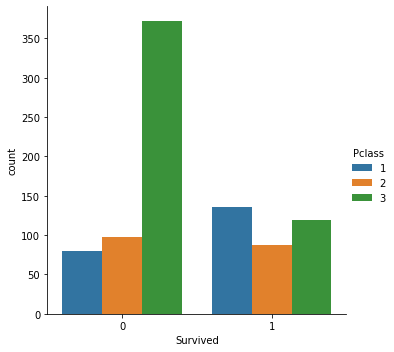

In [16]:
#Try of Pclass

sns.catplot(data = titanic,
            x = 'Survived',
            kind = 'count',
            hue = 'Pclass')

The majority of passengers were 3rd Class, making up 55% of the passengers. Interestingly, there were more 1st Classes (216 passengers) than 2nd Classes (184 passengers) although the difference is not too much. This would make sense because the Titanic was designed to be a luxurious cruise ship for to accomodate the 1st class passengers.

The barplot indicates above 60% survival rate for 1st Class passengers, below 50% for 2nd Classes and only about 25% for 3rd Classes, even though they were the majority. This is a non-rigorous, informal study using data visualization tools to confirm that survival rate is linked to passenger class.

We conduct a similar investigation for the Sex column. The Wikipedia article on the RMS Titanic said "the 'women and children first' protocol was generally followed when loading the lifeboats" so we could expect a higher survival rate for women and children.

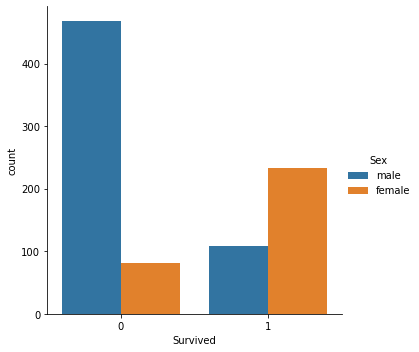

In [17]:
sns.catplot(data = titanic,
            x = 'Survived',
            kind = 'count',
            hue = 'Sex')

Although 65% of passengers were male, the majority of females survived, at a survival rate of 75% compared to the male survival rate at 20%. This confirms another link to the target column Survived: females were more likely to survive than males. 

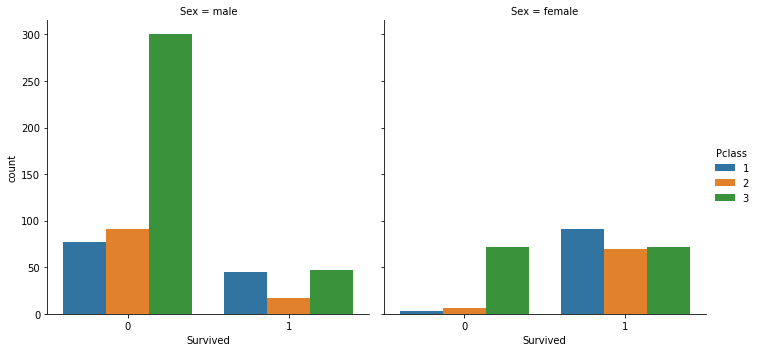

In [18]:
sns.catplot(data = titanic,
            x = 'Survived',
            kind = 'count',
            hue = 'Pclass',
           col='Sex')

This barplot brings us more insights: 1st and 2nd Class females were more likely to survive than 3rd Class females (or males of any class), and the least likeliest passengers to survive are 2nd and 3rd Class males.

The last categorical feature we can look at is the port of embarkment in the Embarked column. Passengers embarked from three different ports named Cherbourg, Queenstown and Southampton, abbreviated with the letters C, Q and S, respectively. We have already seen that Sex and Pclass influence the survival rate of passengers. Does Embarked influence one's survival? 

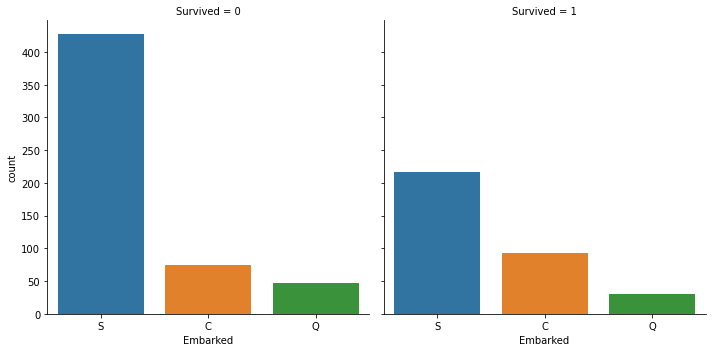

In [19]:
sns.catplot(data = titanic,
            x = 'Embarked',
            col = 'Survived',
            kind = 'count')

Over 72% of passengers embarked from S(outhampton), 19% from C(herbourg) and 9% from Q(ueenstown). However, the survival rate was highest at 55% for Cherbourg, around 40% for Queenstown and 34% for Southampton. We can go further by splitting the Embarked countplots and barplots on other features such as Sex and Pclass.

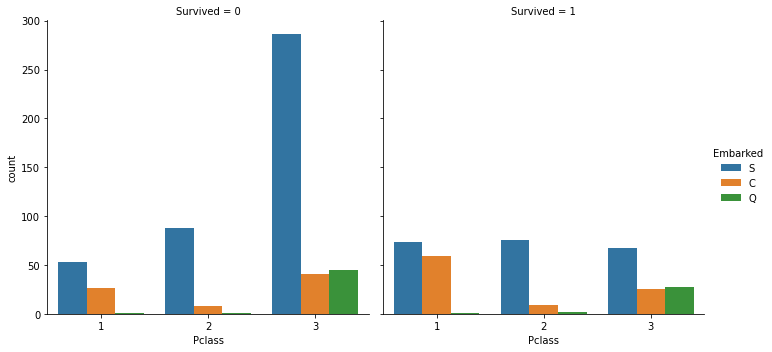

In [20]:
sns.catplot(data = titanic,
            x = 'Pclass',
            col = 'Survived',
            hue = 'Embarked',
            kind = 'count')

So far, we have studied 4/7 categorical columns (the remaining three are Name, Ticket, and Cabin, which are textual and alphanumeric data), so we now turn towards numerical data (SibSp and Parch, excluding the continuous variables Age and Fare) to see their distribution of values.

The column SibSp specifies the number of siblings/spouses on board the Titanic that are related to the passenger. Does having siblings/spouses on the trip influence the survival of the passenger? We find out by investigating this column

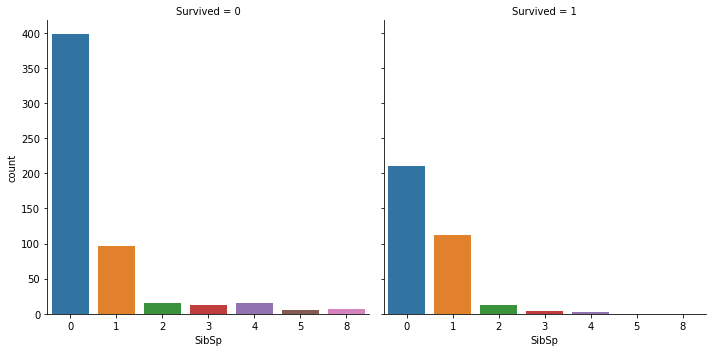

In [21]:
#SibSp and Parch
sns.catplot(data = titanic,
            x = 'SibSp',
            col = 'Survived',
            kind = 'count')

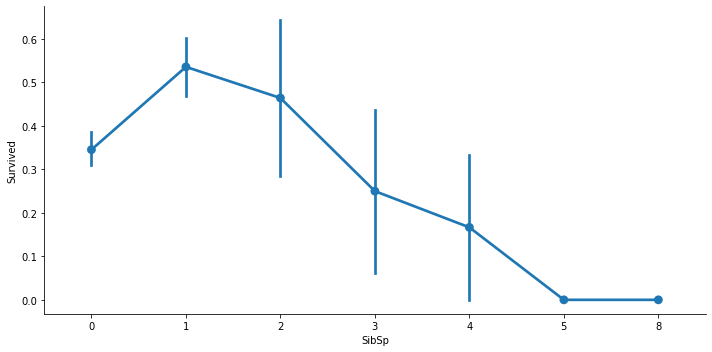

In [22]:
#SibSp and Parch
sns.catplot(data = titanic,
            x = 'SibSp',
            y= 'Survived',
            kind = 'point',
            aspect = 2,
            errorbar = None)

 Passengers having one or two sibling/spouse had a higher survival rate (around 55%) than those with no sibling/spouse (35%).

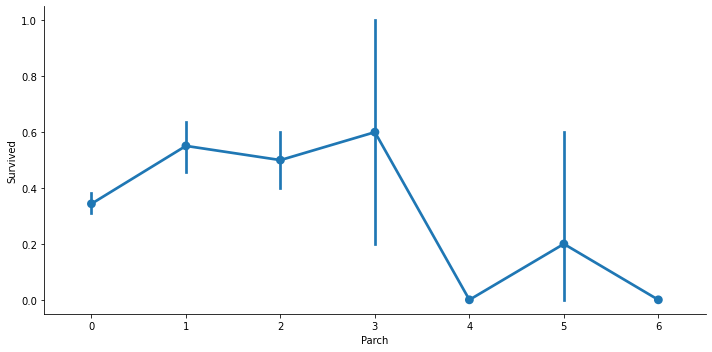

In [23]:
sns.catplot(data = titanic,
            x = 'Parch',
            y= 'Survived',
            kind = 'point',
            aspect = 2,
            errorbar = None)

Again, similar to the SibSp column, passengers with no parents/children were less likely to survive than those with one or two parents/children (around 55%). 

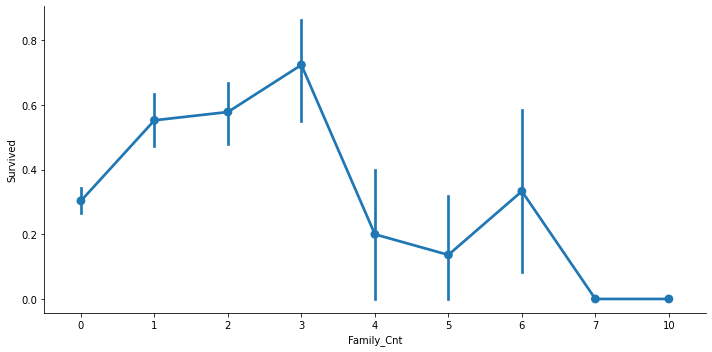

In [24]:
titanic['Family_Cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(data = titanic,
            x = 'Family_Cnt',
            y= 'Survived',
            kind = 'point',
            aspect = 2,
            errorbar = None)

## Data Preprocessing

From the EDA (Exploratory Data Analysis), we should have identified which variables are missing. Now, in the data preprocessing stage, we can start dealing with them. The percentage of missing data values can be calculated using the .isnull() method combined with .sum() and dividing by the number of rows in the dataset

In [25]:
titanic.isnull().sum()*100 / len(titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Family_Cnt      0.000000
dtype: float64

## Handling Missing Values

In real world, the datasets are not clean and may have missing values. We must know how to find and deal with these missing values. 

One of the strategies to deal with missing values is to remove them from the dataset. 

However, whenever possible, we would like to impute the data, which is a process of filling the missing values. 

Let us take a look at the example on how to handle missing values. Only 3 columns out of 12 contain missing data. 

The Age column contains about 20% missing data, which can be dealt with using a technique called imputation, which means replacing the missing values with a known value, such as the mean, median or mode. Age is quantitative, so either mean or median imputation can be done. Embarked is a categorical variable, so mode imputation can be done.

As for the Cabin variable containing 77% missing data, we can simply delete the column. More sophisticated methods would be to see how Cabin numbers relate to the Survived or Pclass column and deal with it accordingly. For example, some of the cabins could be located near where the lifeboats are stored, so passengers residing in those cabins could have a higher chance of survival.

Cabin, Ticket and Name are alphanumeric variables, so extracting the important numbers or letters from them require more involved analysis, which will not be done in this analysis.



## How to  handle missing values?

### Drop NAs

In [26]:
titanic_new = titanic.dropna()

In [27]:
titanic_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family_Cnt     0
dtype: int64

In [28]:
titanic_new.shape

(183, 13)

### Fill NAs / Imputation

In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Cnt       0
dtype: int64

### Mode Imputation

In [30]:
# titanic.pivot_table('PassengerId', index = 'Survived', columns = 'Embarked', aggfunc='count')
mode_embarked = titanic['Embarked'].mode()[0] # Python still thinks the mode-aggregated object is a DataSeries (one column of a DataFrame), so we need to select the string inside the DataSeries, hence the [0].
mode_embarked

'S'

In [31]:
titanic['Embarked'].fillna('S',inplace = True)

In [32]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_Cnt       0
dtype: int64

### Mean Imputation

In [33]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_Cnt       0
dtype: int64

In [34]:
#titanic.groupby(titanic['Cabin'].isnull()).mean()

titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Cnt
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


If the Age value is missing, then the boolean is True, and vice versa. This boolean list is used as conditional selection to produce a subset of the dataset in which only passengers with missing Age data are shown.

An easy way to impute missing values is by using the .replace() method. First, we calculate the mean Age of the passengers using the available non-missing data

In [35]:
mean_age = round(titanic['Age'].mean(),1)
mean_age

29.7

In [36]:
titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Then, we specify the arguments of the replace method. The syntax is .replace(old_value, new_value) and the argument inplace=True makes the replacement permanent.

In [37]:
titanic['Age'].replace(np.nan, mean_age, inplace=True)
# titanic_train.iloc[[5,19,28,863,878],:]

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_Cnt   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [39]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_Cnt       0
dtype: int64

### Deletion

The remaining column with missing data is Cabin (the cabin number). This column contains 77% missing data, so the easiest method would be to get rid of it entirely. Columns can be deleted using the .drop() method

In [40]:
titanic.drop(columns='Cabin', inplace=True)

In [41]:
# Check new dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Additionally, PassengerId, Name, Ticket and Embarked are going to be irrelevant for further analysis, so we can drop those as well.

In [42]:
titanic.drop(columns=['PassengerId','Name','Ticket','Embarked'], inplace=True)

We now have 5 numerical columns and one categorical column (Sex). However, we need to realize that Pclass is an ordinal categorical variable, with 1st class having a higher status than 2nd class, and so on. These categorical varibales need to be changed into numerics because the machine learning algorithm can only understand numbers.

In the case of Pclass, the classes are already represented as numbers but in the reverse order. 3rd class is represented as 3 even though it signifies a lower status than 1st class, which is represented as 1. We could reverse the order and make 3rd class 1 and 1st class 3 but it would be misleading and confusing to interpret.

Representing ordinal categorical variables as integers depending on the order of importance assigned to them is known as label encoding. Label encoding can also be used for nominal variables which has no inherent order, for example, Red, Green, Blue being encoded as 1, 2, 3. The disadvantage is that the machine learning algorithm would misinterpret Blue to have a higher quantitative weight than Red even though they are supposed to be equally important.

Therefore, we use one-hot encoding for Pclass and Sex. One-hot encoding separates categories into binary values of 0 and 1.

In [43]:
titanic = pd.get_dummies(titanic, columns=['Sex'])

In [44]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Cnt,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1


Consider the Sex column first. Initially, it contains the categories "Male" and "Female", specifying the sex of the passenger. We would like to encode these categories as numbers instead of letters so we apply the pandas method .get_dummies() onto the Sex column. After applying the .get_dummies() method, we see two new columns Sex_female and Sex_male, and the original Sex column has disappeared.

In the Sex_male column, if the passenger is male, then he is encoded as 1 and if not she is encoded as 0. The same thing is repeated for the Sex_female column. However, this repetition is undesirable to have because all the required information is already captured within one column. Either keep the Sex_male column and drop the Sex_female, or keep the Sex_female and drop the Sex_male.

In [45]:
# Drop Sex_female
titanic.drop('Sex_female', axis=1, inplace=True) # axis=1 specifies that a column is being dropped. If we want to drop rows, we specify axis=0

In [46]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Cnt,Sex_male
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


We perform the same dummification process of getting dummy columns (the Sex_male and Sex_female are called dummy variables, which are obtained from the original Sex column) for the Pclass column. This time, we add an additional argument drop_first=True to the get_dummies() method to drop one irrelevant column:

In [47]:
titanic = pd.get_dummies(titanic, columns=['Pclass'], drop_first=True)

In [48]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Family_Cnt,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,0,1


In the Pclass column, we had 3 categories: first, second and third class passengers. One-hot encoding for 3 categories works like this: if the passenger is in 1st class, Pclass_1 = 1 and Pclass_2 = Pclass_3 = 0. If the passenger is in 2nd class, Pclass_2 = 1 and Pclass_1 = Pclass_3 = 0, and similarly for 3rd class passengers.

In this case, all the information is captured in two columns (the irrelevant column was already dropped by specifying the drop_first=True argument in the previous line of code). Likewise, if we have 4 categories in a column, we create 3 dummies and drop one, and so on.

## Predictive Analysis
In order to make predictions about the survival rate, we first need to separate the train dataset into independent variables (all the columns except Survived) and the dependent variable (the target column Survived). The test dataset does not contain the Survived column because we are supposed to predict it. Next, we choose a machine learning algorithm and train it using the train dataset. Finally, we ask it to make predictions for the target column using the test dataset.